# Consolidate_EDA( including All steps)

### Perform a complete EDA workflow on a given dataset:  Data cleaning, Univariate & bivariate analysis, Outlier detection, Missing value treatment, Feature correlation analysis.And also Preprocessing using ColumnTransformer to handle missing values, encode categorical data, and scale numerical features.

In [2]:
# sample_data= df.read_csv("adult.csv")
import pandas as pd
sample_data= pd.read_csv("adult.csv")
sample_data.head(2)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K


In [3]:
sample_data.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           15
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       42
income                2
dtype: int64

### Data Cleaning

In [4]:
sample_data.isnull().sum()
#There is "?" instead of null values- replacing it...

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [5]:
import numpy as np
df = sample_data.replace('?', np.nan)
df
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [6]:
df["workclass"].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [7]:
df["occupation"].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [8]:
df["education"].value_counts()

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

In [9]:
df_new = df.copy()

In [10]:
df_new["new_workclass"] = df_new.groupby("occupation")["workclass"].transform(lambda x: x.fillna(x.mode()[0]))

df_new.drop(columns = ["new_workclass"], axis =1, inplace = True)
df_new.isnull().sum()
# Not useful as both columns - workclass and occupation are null simultaneously in all rows

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [11]:
# native.country missing values filling by mode of race of the person
df_new["native.country"] = df_new.groupby("race")["native.country"].transform(lambda x: x.fillna(x.mode()[0]))
df_new.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country       0
income               0
dtype: int64

In [12]:
# occupation missing values filling by mode of education of the person
df_new["occupation"] = df_new.groupby("education")["occupation"].transform(lambda x: x.fillna(x.mode()[0]))
df_new.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation           0
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country       0
income               0
dtype: int64

In [13]:
# workclass missing values filling by mode of occupation of the person
df_new["workclass"] = df_new.groupby("occupation")["workclass"].transform(lambda x: x.fillna(x.mode()[0]))
df_new.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

### Univariate and Bivariate Analysis

In [14]:
df_new.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<Axes: xlabel='age', ylabel='Count'>

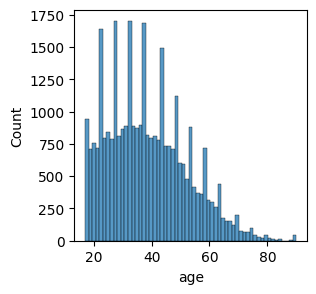

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (3,3))
sns.histplot(df_new["age"])

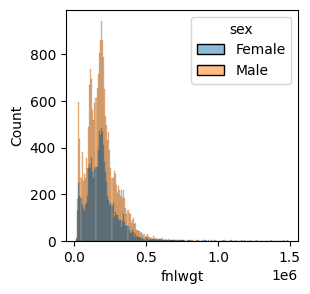

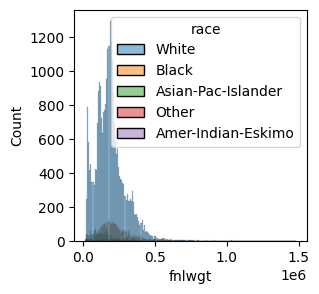

<Axes: xlabel='fnlwgt', ylabel='Count'>

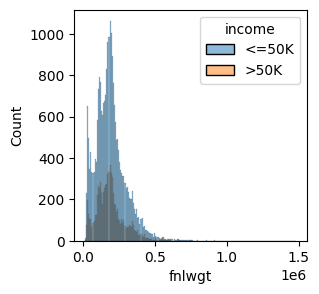

In [16]:
plt.figure(figsize = (3,3))
sns.histplot(data = df_new, x= "fnlwgt", hue = "sex")
plt.show()
plt.figure(figsize = (3,3))
sns.histplot(data = df_new, x= "fnlwgt", hue = "race")
plt.show()
plt.figure(figsize = (3,3))
sns.histplot(data = df_new, x= "fnlwgt", hue = "income")

### fnlwgt column is not making any sense as what it is

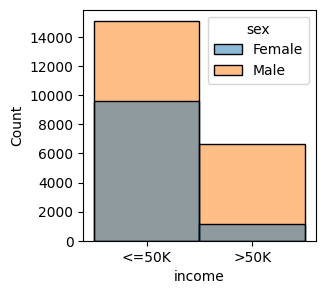

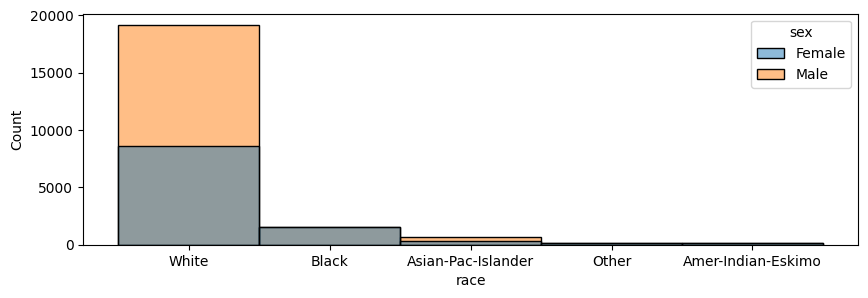

<Axes: xlabel='race', ylabel='Count'>

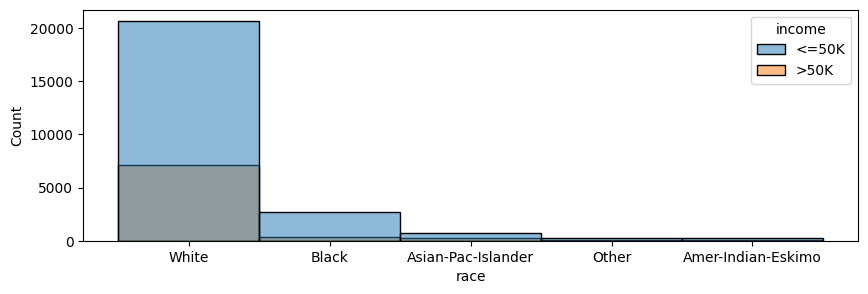

In [17]:
plt.figure(figsize = (3,3))
sns.histplot(data = df_new, x= "income", hue = "sex")
plt.show()
plt.figure(figsize = (10,3))
sns.histplot(data = df_new, x= "race", hue = "sex")
plt.show()
plt.figure(figsize = (10,3))
sns.histplot(data = df_new, x= "race", hue = "income")

### Gender ratio in "high income group (> 50k) is huge compared to low income group - may indicate gender discrimination
### We need more analysis in race diversity

C:\Users\user\AppData\Local\Temp\ipykernel_26728\3627152804.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


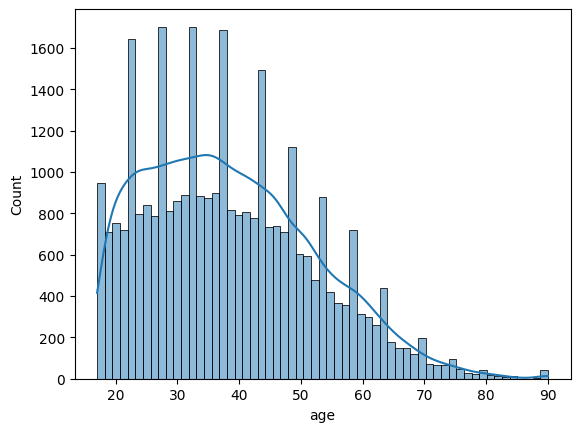

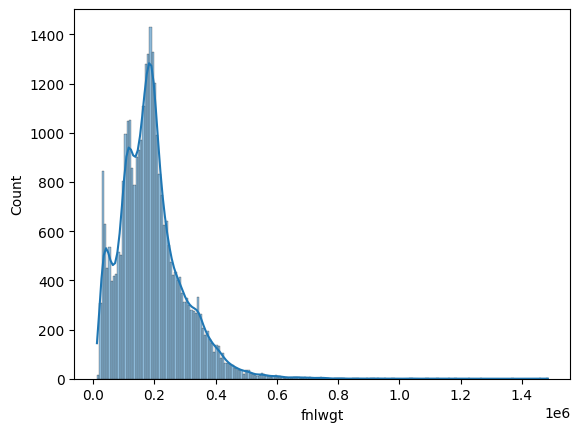

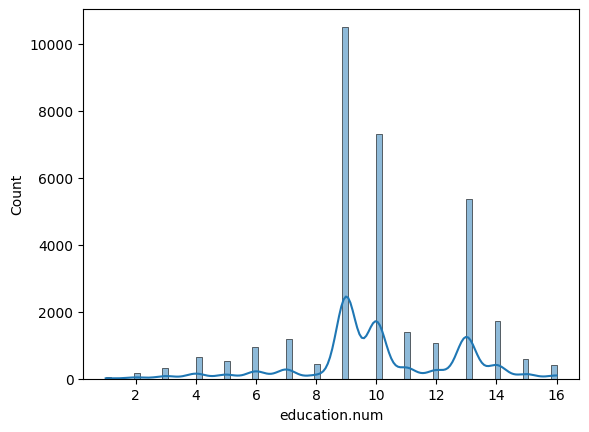

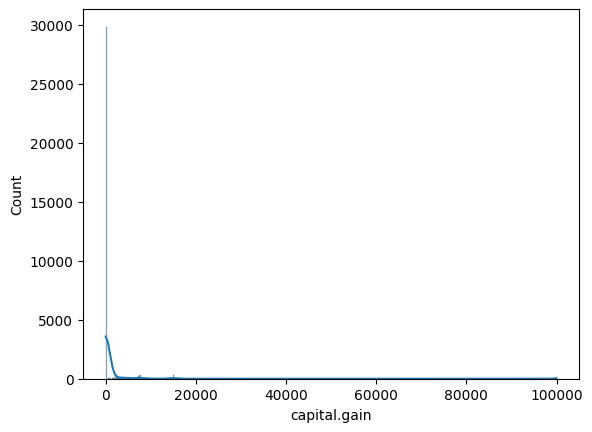

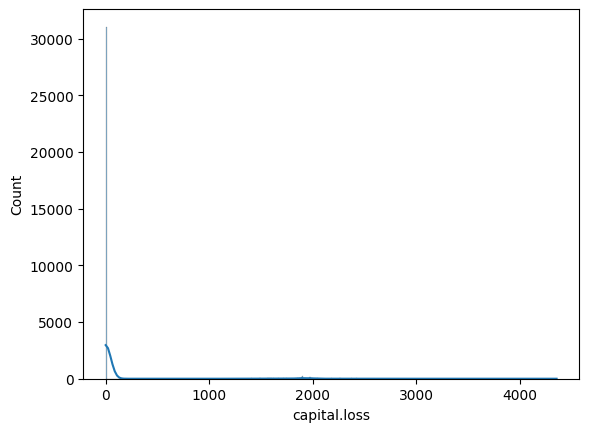

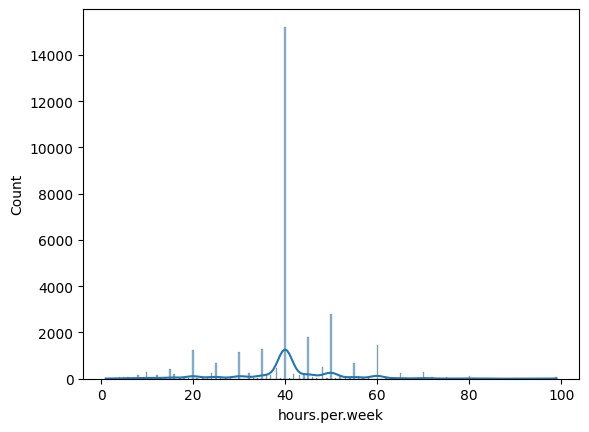

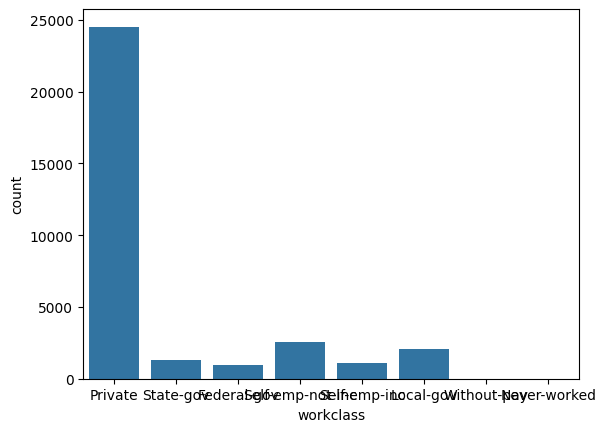

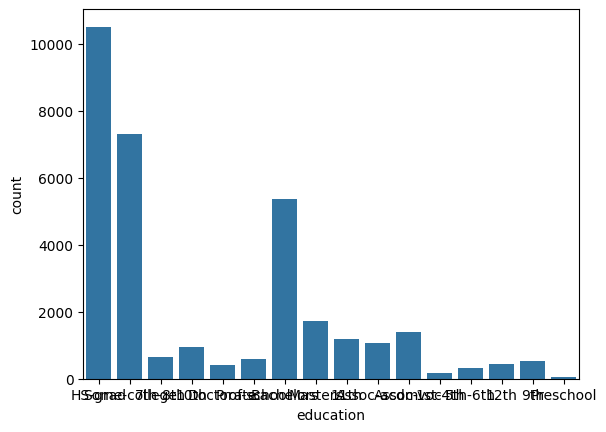

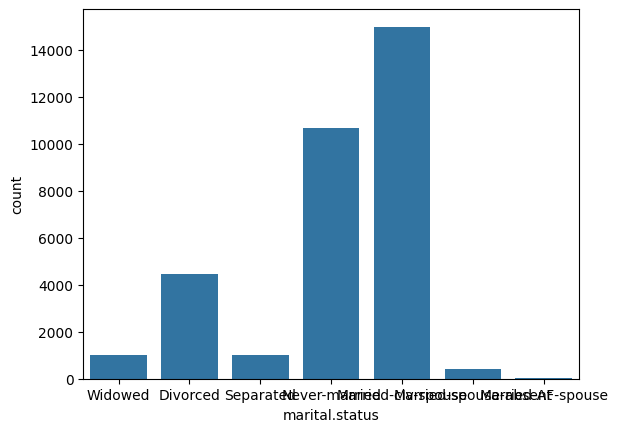

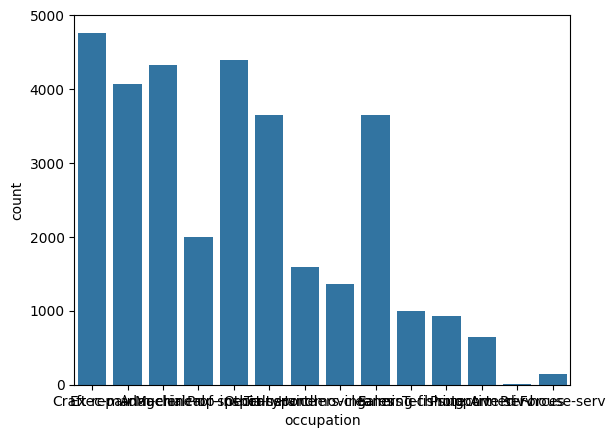

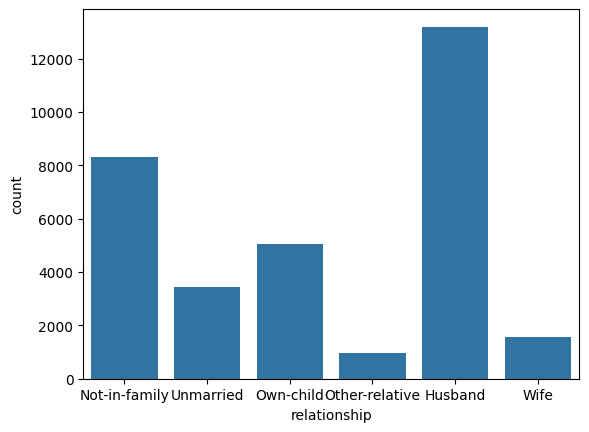

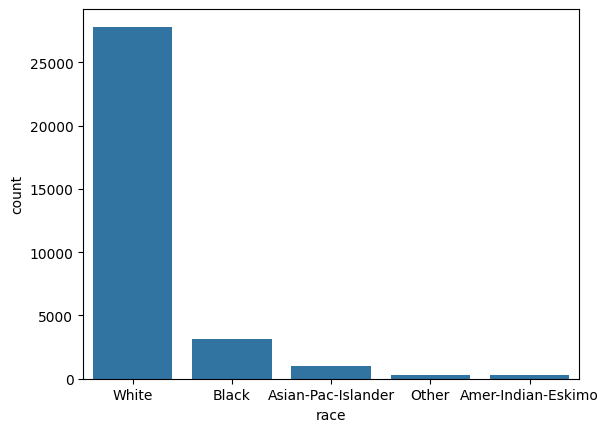

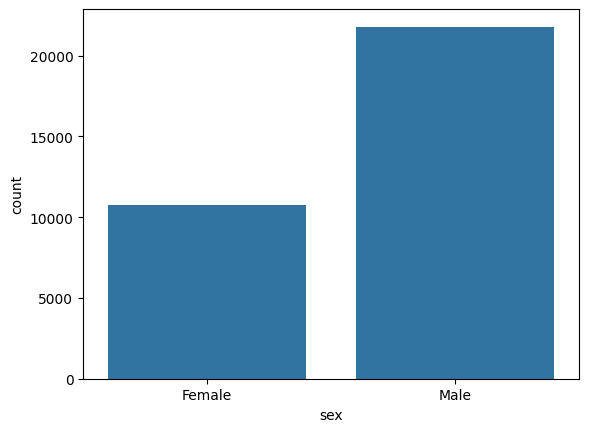

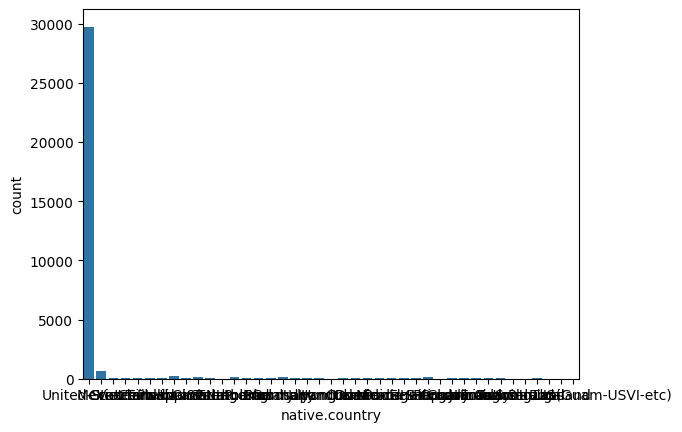

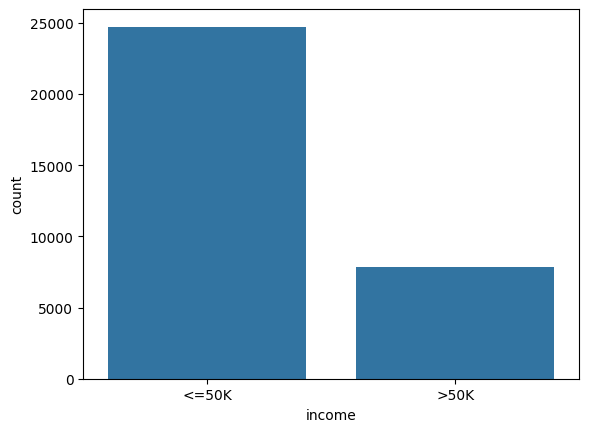

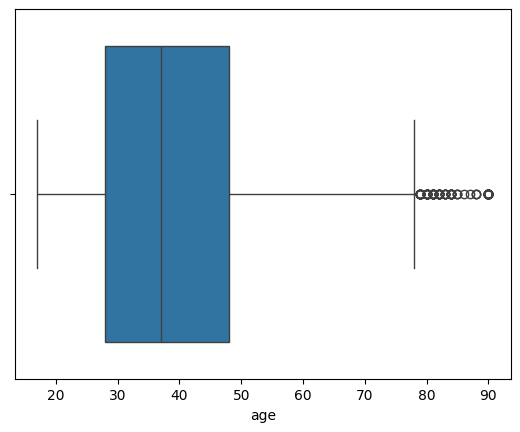

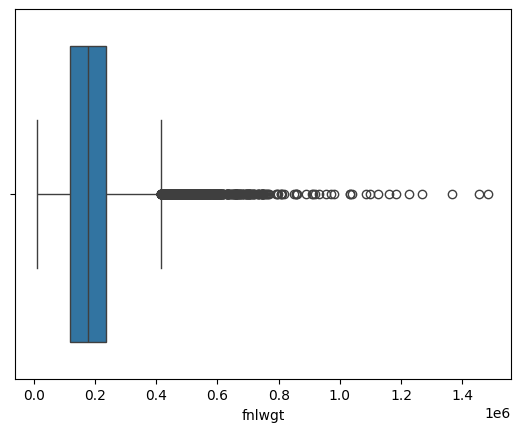

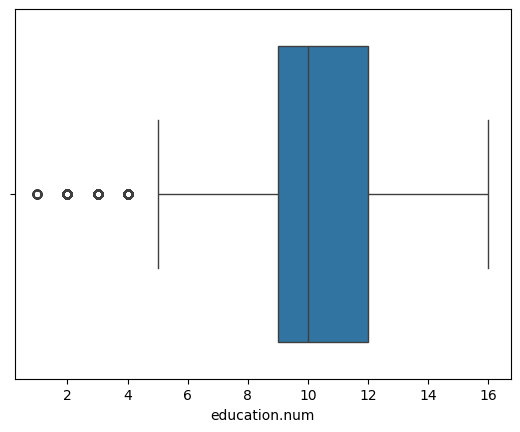

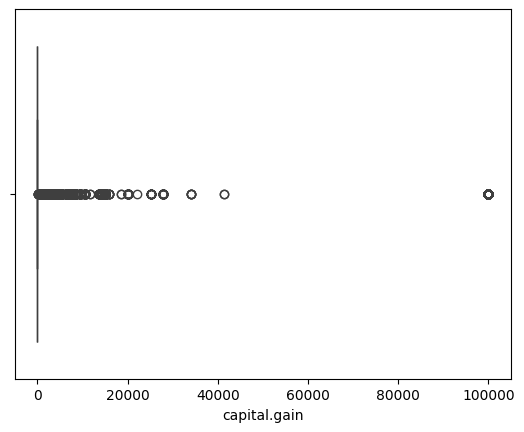

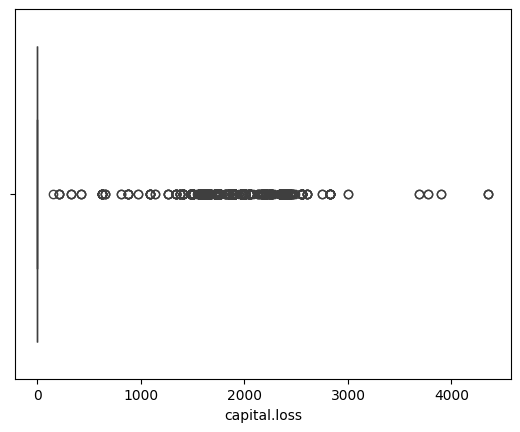

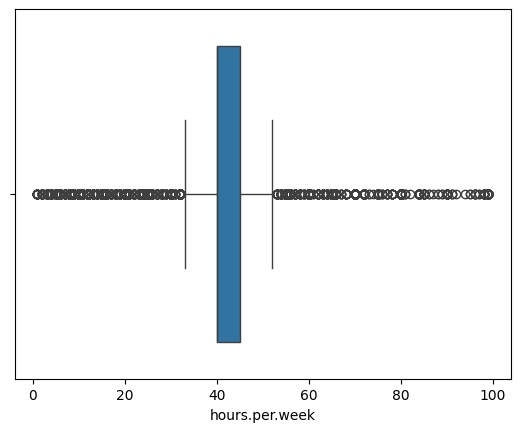

In [18]:
num_cols = df_new.select_dtypes(include=np.number).columns
cat_cols = df_new.select_dtypes(exclude=np.number).columns

for col in num_cols:
    plt.figure()
    sns.histplot(df_new[col], kde=True)

for col in cat_cols:
    plt.figure()
    sns.countplot(x=df_new[col])

for col in num_cols:
    plt.figure()
    sns.boxplot(x=df_new[col])